In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# Cell 3: Basic data generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

validation_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


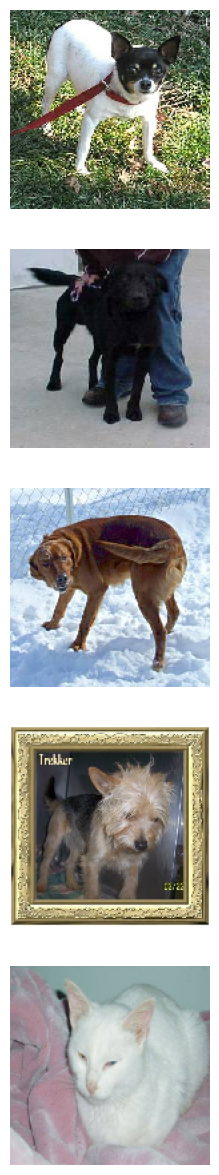

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if len(images_arr) == 1:
        axes = [axes]
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    if probabilities is False:
        plt.show()
        return
    for i, ax in enumerate(axes):
        if probabilities[i] > 0.5:
            ax.set_title("%.2f" % (probabilities[i]*100) + "% dog")
        else:
            ax.set_title("%.2f" % ((1-probabilities[i])*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [ ]:
augmented_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5,
    fill_mode='nearest'
)

In [ ]:
train_data_gen_augmented = augmented_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu',
                          input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 50
history = model.fit(
    train_data_gen_augmented,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // batch_size
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.5150 - loss: 0.7451 - val_accuracy: 0.5022 - val_loss: 0.6869
Epoch 2/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4609 - loss: 0.6900

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4609 - loss: 0.6900 - val_accuracy: 0.4808 - val_loss: 0.6887
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.4999 - loss: 0.6928 - val_accuracy: 0.6183 - val_loss: 0.6831
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6016 - loss: 0.6848 - val_accuracy: 0.6058 - val_loss: 0.6820
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.5578 - loss: 0.6830 - val_accuracy: 0.6116 - val_loss: 0.6586
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5703 - loss: 0.6734 - val_accuracy: 0.5769 - val_loss: 0.6668
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.5194 - loss: 0.6841 - val_accuracy: 0.6339 - val_loss: 0.6567
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5938 - loss: 0.6682 - val_accuracy: 0.5769 - val_loss: 0.6681
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.5882 - loss: 0.6586 - val_accuracy: 0.6060 - val_loss: 0.6489

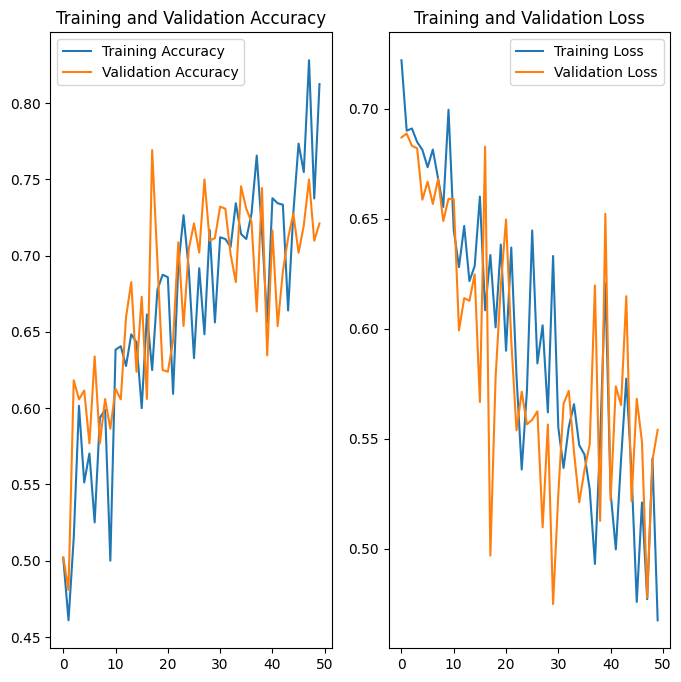

In [ ]:
# Cell 9: Visualize results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_path = os.path.join(PATH, 'test')
if not os.path.exists(test_path):
    print("Note: Test directory not found. Make sure to create it and add test images.")

test_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_generator.flow_from_directory(
    directory=test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

if test_data_gen.samples > 0:
    predictions = model.predict(test_data_gen, steps=test_data_gen.samples)
    print(f"Predictions shape: {predictions.shape}")

Found 0 images belonging to 0 classes.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


<ipython-input-4-b90cd97f10a6>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % (probabilities[i]*100) + "% dog")
<ipython-input-4-b90cd97f10a6>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title("%.2f" % ((1-probabilities[i])*100) + "% cat")


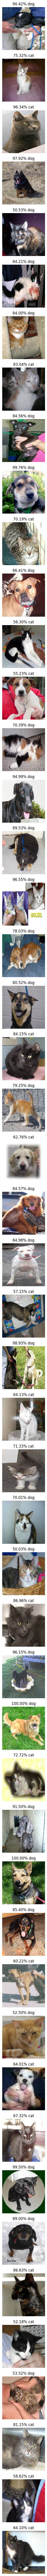

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_test_images(test_dir, img_height, img_width):
    test_images = []
    test_files = sorted([f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

    for filename in test_files:
        img_path = os.path.join(test_dir, filename)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Rescale
        test_images.append(img_array)

    return np.array(test_images)

# Load and preprocess test images
test_images = load_test_images(test_dir, IMG_HEIGHT, IMG_WIDTH)

if len(test_images) > 0:
    # Make predictions
    probabilities = model.predict(test_images)

    # Plot results
    plotImages(test_images, probabilities)
else:
    print("No test images found in directory:", test_dir)

In [ ]:
answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
           1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
           0, 0, 0, 0, 0, 0]

correct = 0

# Iterate through probabilities and answers, rounding each probability
for probability, answer in zip(probabilities.flatten(), answers):
    if round(float(probability)) == answer:
        correct += 1

# Calculate the percentage of correctly identified images
percentage_identified = (correct / len(answers)) * 100

# Check if the model passes the challenge
passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
